<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Stock_Portfolio(custom)_ver1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **üìà Ï¢ÖÎ™©ÏÑ†ÌÉù Î∞©Î≤ï**
- ÏÇ¨Ïö©ÏûêÍ∞Ä ÏõêÌïòÎäî ÌäπÏ†ï Ï¢ÖÎ™©ÏúºÎ°ú Íµ¨ÏÑ±


# **üìä Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî Î∞©Î≤ï**  
1. **Max Sharpe Ratio** : ÏÉ§ÌîÑÎπÑÏú®Ïù¥ ÏµúÎåÄÍ∞Ä ÎêòÎèÑÎ°ù Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî  
    => ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±ÏùÑ Î™®Îëê Í≥†Î†§
2. **‚úî Efficient Risk**   : Ï£ºÏñ¥ÏßÑ Î≥ÄÎèôÏÑ± ( target_volatility ) Î≥¥Îã§ ÎÇÆÏùÄ Î≤îÏúÑ ÎÇ¥ÏóêÏÑú ÏàòÏùµÎ•† (Return)Ïù¥ ÏµúÎåÄÍ∞Ä ÎêòÎèÑÎ°ù Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî  
    => ÎÜíÏùÄ Ïù¥ÏùµÏùÑ Ï∂îÍµ¨ÌïòÍ∏∞ Î≥¥Îã§Îäî, ÎπÑÍµêÏ†Å ÏúÑÌóòÏù¥ ÎÇÆÏùÄ Ìà¨ÏûêÎ•º ÏõêÌïòÎäî Ìà¨ÏûêÏûêÏóêÍ≤å Ï∂îÏ≤ú
3. **Efficient Return** : Ï£ºÏñ¥ÏßÑ Î¶¨Ïä§ÌÅ¨ ( target_return )ÏùÑ ÎßåÏ°±ÏãúÌÇ§Îäî ÏÑ†ÏóêÏÑú Î≥ÄÎèôÏÑ±(volatility)Î•º ÏµúÏÜåÍ∞Ä ÎêòÎèÑÎ°ù Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî  
    => ÎÜíÏùÄ ÏúÑÌóòÏùÑ Í∞êÏàòÌïòÎçîÎùºÎèÑ, ÎÜíÏùÄ Ïù¥ÏùµÏùÑ Ï∂îÍµ¨ÌïòÎäî Ìà¨Ïûê ÏÑ±Ìñ•ÏùÑ Í∞ÄÏßÑ Ìà¨ÏûêÏûêÏóêÍ≤å Ï∂îÏ≤ú

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!pip install -q install finance-datareader

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import datetime
import requests

In [ ]:
# Íµ≠ÎÇ¥ Ï¢ÖÎ™©(ÏÇºÏÑ±Ï†ÑÏûê, SKÌïòÏù¥ÎãâÏä§, Ïπ¥Ïπ¥Ïò§, NAVER, LGÌôîÌïô )
assets =  ['005930', '000660', '035720', '035420', '051910']

In [ ]:
len(assets)

5

### Ï¢ÖÎ™©ÏΩîÎìúÏôÄ Ï¢ÖÎ™©Ïù¥Î¶ÑÏùÑ ÎîïÏÖîÎÑàÎ¶¨Î°ú Ï†ÄÏû•

In [ ]:
###########Ï∂îÍ∞Ä#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJÎÑ§Ìä∏ÏõçÏä§',
 '006840': 'AKÌôÄÎî©Ïä§',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200ÎèôÏùºÍ∞ÄÏ§ë',
 '253150': 'ARIRANG 200ÏÑ†Î¨ºÎ†àÎ≤ÑÎ¶¨ÏßÄ',
 '253160': 'ARIRANG 200ÏÑ†Î¨ºÏù∏Î≤ÑÏä§2X',
 '395750': 'ARIRANG ESGÍ∞ÄÏπòÏ£ºÏï°Ìã∞Î∏å',
 '395760': 'ARIRANG ESGÏÑ±Ïû•Ï£ºÏï°Ìã∞Î∏å',
 '278420': 'ARIRANG ESGÏö∞ÏàòÍ∏∞ÏóÖ',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300Ìó¨Ïä§ÏºÄÏñ¥',
 '333940': 'ARIRANG KSÎ°úÏö∞Î≥ºÍ∞ÄÏ§ëTR',
 '333950': 'ARIRANG KSÎ°úÏö∞ÏÇ¨Ïù¥Ï¶àÍ∞ÄÏ§ëTR',
 '333960': 'ARIRANG KSÎ™®Î©òÌÖÄÍ∞ÄÏ§ëTR',
 '333970': 'ARIRANG KSÎ∞∏Î•òÍ∞ÄÏ§ëTR',
 '333980': 'ARIRANG KSÌÄÑÎ¶¨Ìã∞Í∞ÄÏ§ëTR',
 '269530': 'ARIRANG S&PÍ∏ÄÎ°úÎ≤åÏù∏ÌîÑÎùº',
 '251590': 'ARIRANG Í≥†Î∞∞ÎãπÏ†ÄÎ≥ÄÎèô50',
 '161510': 'ARIRANG Í≥†Î∞∞ÎãπÏ£º',
 '251600': 'ARIRANG Í≥†Î∞∞ÎãπÏ£ºÏ±ÑÍ∂åÌòºÌï©',
 '289670': 'ARIRANG Íµ≠Ï±ÑÏÑ†Î¨º10ÎÖÑ',
 '298340': 'ARIRANG Íµ≠Ï±ÑÏÑ†Î¨º3ÎÖÑ',
 '189400': 'ARIRANG Í∏ÄÎ°úÎ≤åMSCI(Ìï©ÏÑ± H)',
 '278620': 'ARIRANG Îã®Í∏∞Ï±ÑÍ∂åÏï°Ìã∞Î∏å',
 '269540': 'ARIRANG ÎØ∏Íµ≠S&P500(H)',
 '287180'

### 3ÎÖÑÏπò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [ ]:
# Ï¢ÖÎ™©Î≥Ñ Ï¢ÖÍ∞Ä Í∞ÄÏ†∏Ïò§Í∏∞
from datetime import datetime

#ÏãúÏûëÏùº
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# Í∞Å Ï£ºÏãùÏùò ÏùºÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReaderÎ°ú Í∞Å Ï¢ÖÎ™©Ïùò Ï¢ÖÍ∞ÄÎç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

005930  000660  035720  035420  051910
Date                                              
2018-07-19   46900   90300   22881  153217  336000
2018-07-20   47450   87900   23082  154218  332500
2018-07-23   46500   81700   23182  155019  333000
2018-07-24   46150   83600   23483  149211  330500
2018-07-25   46150   80500   23684  149411  361500
...            ...     ...     ...     ...     ...
2021-07-13   79800  123000  161000  441000  840000
2021-07-14   79500  123500  162000  444000  844000
2021-07-15   80600  123500  159500  449000  818000
2021-07-16   79800  121500  157000  447000  828000
2021-07-19   79000  119000  154000  443000  820000

[740 rows x 5 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   005930  740 non-null    int64
 1   000660  740 non-null    int64
 2   035720  740 non-null    int64
 3   035420  740 non-null    int64
 4   051910  740 non-null    int64
dtypes: int64(5)
memory usage: 34.7 KB


In [ ]:
df.isnull().sum()

005930    0
000660    0
035720    0
035420    0
051910    0
dtype: int64

In [ ]:
# Í≤∞Ï∏°Í∞í ÏûàÎäî Ïó¥ ÏÇ≠Ï†ú 
df2 = df.dropna(axis = 1)
df2

005930  000660  035720  035420  051910
Date                                              
2018-07-19   46900   90300   22881  153217  336000
2018-07-20   47450   87900   23082  154218  332500
2018-07-23   46500   81700   23182  155019  333000
2018-07-24   46150   83600   23483  149211  330500
2018-07-25   46150   80500   23684  149411  361500
...            ...     ...     ...     ...     ...
2021-07-13   79800  123000  161000  441000  840000
2021-07-14   79500  123500  162000  444000  844000
2021-07-15   80600  123500  159500  449000  818000
2021-07-16   79800  121500  157000  447000  828000
2021-07-19   79000  119000  154000  443000  820000

[740 rows x 5 columns]

### Ï¢ÖÎ™©Î≥Ñ Ïó∞ÌèâÍ∑† Í∏∞ÎåÄÏàòÏùµÎ•† & ÏùºÍ∞ÑÏàòÏùµÎ•†Ïùò Í≥µÎ∂ÑÏÇ∞

In [ ]:
!pip install PyPortfolioOpt

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 60 kB 3.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.7 MB 9.2 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#### ver01> Ï¢ÖÍ∞ÄÏóê Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ï¢ÖÎ™©ÏùÑ ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùÄ dfÎ°ú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ± ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
# Calculate the expected annualized returns
# Î≥µÎ¶¨ Ïó∞ÌèâÍ∑† ÏàòÏùµÎ•†
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df)

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df)

In [ ]:
mu

005930    0.194596
000660    0.098682
035720    0.915864
035420    0.436265
051910    0.355593
dtype: float64

In [ ]:
len(mu)

5

In [ ]:
S

005930    000660    035720    035420    051910
005930  0.073104  0.073651  0.027667  0.030521  0.048315
000660  0.073651  0.145887  0.034871  0.040453  0.057531
035720  0.027667  0.034871  0.128514  0.072360  0.055423
035420  0.030521  0.040453  0.072360  0.131487  0.046115
051910  0.048315  0.057531  0.055423  0.046115  0.185595

In [ ]:
len(S)

5

In [ ]:
S.shape

(5, 5)

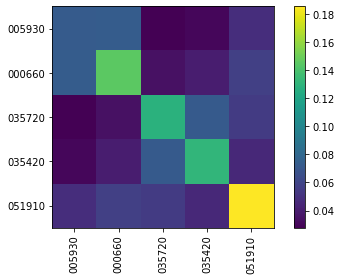

In [ ]:
# ÏàòÏùµÎ•†Ïùò Í≥µÎ∂ÑÏÇ∞
from pypfopt import plotting

plotting.plot_covariance(S)

#### ver02> Ï¢ÖÍ∞ÄÏóê Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ï¢ÖÎ™©ÏùÑ ÏÇ≠Ï†úÌïú df2Î°ú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ± ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
# Calculate the expected annualized returns
# Î≥µÎ¶¨ Ïó∞ÌèâÍ∑† ÏàòÏùµÎ•†
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu2 = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S2 = risk_models.sample_cov(df2)

In [ ]:
mu2

005930    0.194596
000660    0.098682
035720    0.915864
035420    0.436265
051910    0.355593
dtype: float64

In [ ]:
len(mu2)

5

In [ ]:
S2.shape

(5, 5)

In [ ]:
len(S2)

5

In [ ]:
S2

005930    000660    035720    035420    051910
005930  0.073104  0.073651  0.027667  0.030521  0.048315
000660  0.073651  0.145887  0.034871  0.040453  0.057531
035720  0.027667  0.034871  0.128514  0.072360  0.055423
035420  0.030521  0.040453  0.072360  0.131487  0.046115
051910  0.048315  0.057531  0.055423  0.046115  0.185595

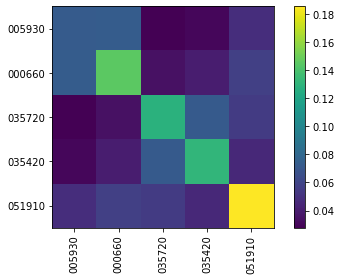

In [ ]:
# ÏàòÏùµÎ•†Ïùò Í≥µÎ∂ÑÏÇ∞
from pypfopt import plotting

plotting.plot_covariance(S2)

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî ( Efficient Risk )

#### ver01> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùå / df / mu, S / ef, cleaned_weights ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [ ]:
# Efficient_riskÎ°ú ÏµúÏ†ÅÌôî ÌñàÏùÑÎïåÏùò Í≤∞Í≥º ÌôïÏù∏
vol_limit = 0.3
ef = EfficientFrontier(mu, S)
ef.efficient_risk(vol_limit)
ef.portfolio_performance(verbose=True)

Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44


(0.7507075730840602, 0.29999999998539145, 2.4356919103988073)

In [ ]:
# max_sharpeÎ°ú ÏµúÏ†ÅÌôî ÌñàÏùÑÎïåÏùò Í≤∞Í≥º ÌôïÏù∏
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50


(0.9158641499574108, 0.3584883585768835, 2.4990048589409875)

In [ ]:
from pypfopt import risk_models, expected_returns
from pypfopt import EfficientFrontier, objective_functions
import cvxpy as cp

# Risk Î≤îÏúÑ ÎÇ¥ÏóêÏÑú ReturnÏùÑ ÏµúÎåÄÎ°ú !
vol_limit = 0.3

ef = EfficientFrontier(mu, S)  # Create the Efficient Frontier Object

weights = ef.efficient_risk(vol_limit)

cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('005930', 0.22898), ('000660', 0.0), ('035720', 0.77102), ('035420', 0.0), ('051910', 0.0)])
Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44


(0.7507075730840602, 0.29999999998539145, 2.4356919103988073)

In [ ]:
weights

OrderedDict([('005930', 0.2289809515106097),
             ('000660', 2.401783e-10),
             ('035720', 0.7710190420707289),
             ('035420', 1.5091018e-09),
             ('051910', 4.6690082e-09)])

In [ ]:
len(weights)

5

In [ ]:
cleaned_weights

OrderedDict([('005930', 0.22898),
             ('000660', 0.0),
             ('035720', 0.77102),
             ('035420', 0.0),
             ('051910', 0.0)])

In [ ]:
len(cleaned_weights)

5

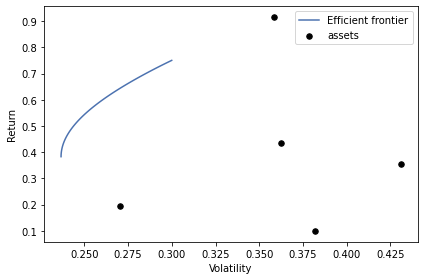

In [ ]:
# Ìö®Ïú®Ï†Å Ìà¨ÏûêÏÑ†ÏôÄ Í∞Å Ï¢ÖÎ™©Ïùò ÏàòÏùµÎ•† & Î≥ÄÎèôÏÑ±
import matplotlib.pyplot as plt

# ef = EfficientFrontier(mu, S, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

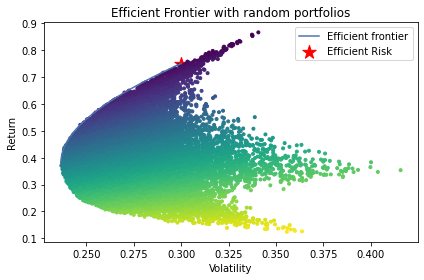

In [ ]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
vol_limit = 0.3
ef.efficient_risk(vol_limit)
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # Í∏∞ÎåÄÏàòÏùµÎ•† , Risk(Î≥ÄÎèôÏÑ±)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Efficient Risk")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # ÎÇúÏàòÎ°ú 20000ÏÑ∏Ìä∏Ïùò Ìà¨ÏûêÎπÑÏ§ë ÎßåÎì§Í∏∞
rets = w.dot(mu)                                     # Í∏∞ÎåÄÏàòÏùµÎ•†
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(Î≥ÄÎèôÏÑ±)
sharpes = rets / stds                                # ÏÉ§ÌîÑÎπÑÏú®

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [ ]:
# Max.Sharpe RatioÎ°ú ÏµúÏ†ÅÌôîÌïú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±, ÏÉ§ÌîÑÎπÑÏú®
ef.portfolio_performance(verbose=True)

Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44


(0.7507075731332769, 0.2999999999827011, 2.4356919105847052)

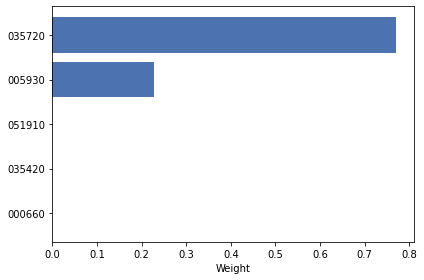

In [ ]:
# Ï¢ÖÎ™©Î≥Ñ Ìà¨ÏûêÎπÑÏ§ë
plotting.plot_weights(weights, ax=None)

#### ver02> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú / df2 / mu2, S2 / ef2, cleaned_weights2 ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
# Efficient_riskÎ°ú ÏµúÏ†ÅÌôî ÌñàÏùÑÎïåÏùò Í≤∞Í≥º ÌôïÏù∏
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)
ef2.efficient_risk(vol_limit2)
ef2.portfolio_performance(verbose=True)

Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44


(0.7507075730840602, 0.29999999998539145, 2.4356919103988073)

In [ ]:
# max_sharpeÎ°ú ÏµúÏ†ÅÌôî ÌñàÏùÑÎïåÏùò Í≤∞Í≥º ÌôïÏù∏
ef2 = EfficientFrontier(mu2, S2)
ef2.max_sharpe()
ef2.portfolio_performance(verbose=True)

Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50


(0.9158641499574108, 0.3584883585768835, 2.4990048589409875)

In [ ]:
# Risk Î≤îÏúÑ ÎÇ¥ÏóêÏÑú ReturnÏùÑ ÏµúÎåÄÎ°ú !
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)  # Create the Efficient Frontier Object

weights2 = ef2.efficient_risk(vol_limit2)

cleaned_weights2 = ef2.clean_weights()
print(cleaned_weights2)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef2.portfolio_performance(verbose=True)

OrderedDict([('005930', 0.22898), ('000660', 0.0), ('035720', 0.77102), ('035420', 0.0), ('051910', 0.0)])
Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44


(0.7507075730840602, 0.29999999998539145, 2.4356919103988073)

In [ ]:
weights2

OrderedDict([('005930', 0.2289809515106097),
             ('000660', 2.401783e-10),
             ('035720', 0.7710190420707289),
             ('035420', 1.5091018e-09),
             ('051910', 4.6690082e-09)])

In [ ]:
len(weights2)

5

In [ ]:
cleaned_weights2

OrderedDict([('005930', 0.22898),
             ('000660', 0.0),
             ('035720', 0.77102),
             ('035420', 0.0),
             ('051910', 0.0)])

In [ ]:
len(cleaned_weights2)

5

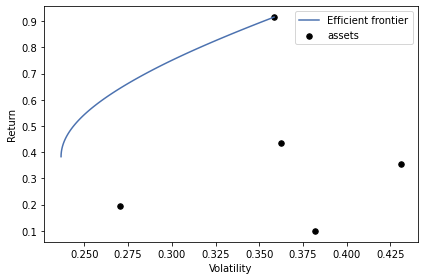

In [ ]:
# Ìö®Ïú®Ï†Å Ìà¨ÏûêÏÑ†ÏôÄ Í∞Å Ï¢ÖÎ™©Ïùò ÏàòÏùµÎ•† & Î≥ÄÎèôÏÑ±
import matplotlib.pyplot as plt

ef2 = EfficientFrontier(mu2, S2, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

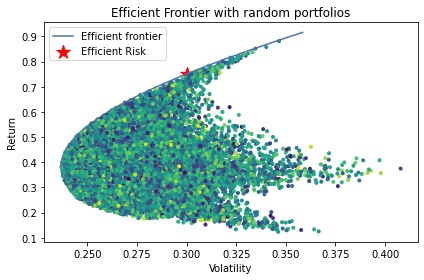

In [ ]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=False)

# Find the tangency portfolio
vol_limit2 = 0.3
ef2.efficient_risk(vol_limit2)
ret_tangent2, std_tangent2, _ = ef2.portfolio_performance()  # Í∏∞ÎåÄÏàòÏùµÎ•† , Risk(Î≥ÄÎèôÏÑ±)
ax.scatter(std_tangent2, ret_tangent2, marker="*", s=200, c="r", label="Efficient Risk")

# Generate random portfolios
n_samples = 20000
w2 = np.random.dirichlet(np.ones(len(mu2)), n_samples) # ÎÇúÏàòÎ°ú 20000ÏÑ∏Ìä∏Ïùò Ìà¨ÏûêÎπÑÏ§ë ÎßåÎì§Í∏∞
rets2 = w2.dot(mu2)                                     # Í∏∞ÎåÄÏàòÏùµÎ•†
stds2 = np.sqrt(np.diag(w2 @ S2 @ w2.T))                 # Risk(Î≥ÄÎèôÏÑ±)
sharpes2 = rets2 / stds2                                # ÏÉ§ÌîÑÎπÑÏú®

ax.scatter(stds2, rets2, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [ ]:
# Efficient RiskÎ°ú ÏµúÏ†ÅÌôîÌïú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±, ÏÉ§ÌîÑÎπÑÏú®
ef2.portfolio_performance(verbose=True)

Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44


(0.7507075732690215, 0.3000000000078708, 2.435691910832835)

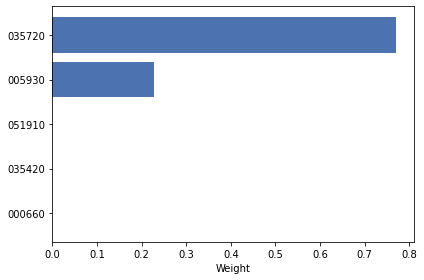

In [ ]:
# Ï¢ÖÎ™©Î≥Ñ Ìà¨ÏûêÎπÑÏ§ë
plotting.plot_weights(weights2, ax=None)

### Ìà¨ÏûêÍ∏àÏï°Í≥º Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÎπÑÏ§ëÏóê ÎßûÏ∂îÏñ¥ ÏàòÎüâ Ìï†Îãπ

In [ ]:
!pip install pulp

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 41.2 MB 72 kB/s 


#### ver01> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùå / df / mu, S / ef, cleaned_weights ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# Ìà¨ÏûêÍ∏àÏï° (Îã®ÏúÑ: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')

rmse = da._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'005930': 43, '035720': 75}
Funds Remaining:  53000.0  KRW
Allocation has RMSE: 0.001


In [ ]:
allocation

{'005930': 43, '035720': 75}

In [ ]:
len(allocation)

2

#### ver02> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú / df2 / mu2, S2 / ef2, cleaned_weights2 /  ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# Ìà¨ÏûêÍ∏àÏï° (Îã®ÏúÑ: KRW)
portfolio_val = 15000000

latest_prices2 = get_latest_prices(df2)

weights2 = cleaned_weights2

da2 = DiscreteAllocation(weights2, latest_prices2, total_portfolio_value=portfolio_val)

allocation2, leftover2 = da2.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation2)
print('Funds Remaining: ', leftover2, ' KRW')

rmse2 = da2._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'005930': 43, '035720': 75}
Funds Remaining:  53000.0  KRW
Allocation has RMSE: 0.001


In [ ]:
allocation2

{'005930': 43, '035720': 75}

In [ ]:
len(allocation2)

2

### Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≤∞Í≥ºÎ°ú Î≥¥Ïó¨Ï§Ñ Î≥ÄÏàò Ï†ÄÏû•

#### ver01> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùå ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
# Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê Í∏àÏï°
inv_total_price = {}

for i in allocation.keys():
  inv_total_price[i] = latest_prices.loc[i]*allocation[i]
inv_total_price

{'005930': 3397000, '035720': 11550000}

In [ ]:
# Ï¥ù Ìà¨ÏûêÍ∏àÏï°
investment = 0

for i in inv_total_price.values():
    investment += i
print(investment)

14947000


In [ ]:
portfolio_val-leftover

14947000.0

In [ ]:
# Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê ÎπÑÏ§ë
inv_total_weight = {}

for i in allocation.keys():
  inv_total_weight[i] = inv_total_price[i]/investment
inv_total_weight

{'005930': 0.22726968622466046, '035720': 0.7727303137753395}

In [ ]:
# Ìà¨ÏûêÎπÑÏ§ëÏùò Ìï©Í≥Ñ
investment_w = 0

for i in inv_total_weight.values():
    investment_w += i
print(investment_w)

1.0


In [ ]:
# Í≤∞Í≥ºÍ∞íÏúºÎ°ú Î∂àÎü¨Ïò¨ Í∞íÏùÑ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
name_list = []                    # Ï¢ÖÎ™©Î™Ö(ÌöåÏÇ¨Ïù¥Î¶Ñ)
total_price_stock =[]             # Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê Í∏àÏï°
total_weight_stock = []           # Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê ÎπÑÏ§ë

for i in allocation.keys(): # i = Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïóê Ìï†ÎãπÎêú Ï¢ÖÎ™©Ïùò Ï¢ÖÎ™©ÏΩîÎìú
    name_list.append(code_name_dict.get(i))
    total_price_stock.append(inv_total_price.get(i))
    total_weight_stock.append(inv_total_weight.get(i))

In [ ]:
name_list

['ÏÇºÏÑ±Ï†ÑÏûê', 'Ïπ¥Ïπ¥Ïò§']

In [ ]:
total_price_stock

[3397000, 11550000]

In [ ]:
total_weight_stock

[0.22726968622466046, 0.7727303137753395]

In [ ]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [ ]:
discrete_allocation_list

[43, 75]

In [ ]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['Ï¢ÖÎ™©Î™Ö','Ï¢ÖÎ™©ÏΩîÎìú','ÏàòÎüâ(Ï£º)', 'Ìà¨ÏûêÍ∏àÏï°(Ïõê)','Ìà¨ÏûêÎπÑÏ§ë'])
portfolio_df

Empty DataFrame
Columns: [Ï¢ÖÎ™©Î™Ö, Ï¢ÖÎ™©ÏΩîÎìú, ÏàòÎüâ(Ï£º), Ìà¨ÏûêÍ∏àÏï°(Ïõê), Ìà¨ÏûêÎπÑÏ§ë]
Index: []

In [ ]:
# portfolio_df['Company_name'] = company_name
portfolio_df['Ï¢ÖÎ™©Î™Ö'] = name_list
portfolio_df['Ï¢ÖÎ™©ÏΩîÎìú'] = allocation
portfolio_df['ÏàòÎüâ(Ï£º)'] = discrete_allocation_list
portfolio_df['Ìà¨ÏûêÍ∏àÏï°(Ïõê)'] = total_price_stock
portfolio_df['Ìà¨ÏûêÎπÑÏ§ë'] = total_weight_stock

In [ ]:
portfolio_df

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)   Ìà¨ÏûêÍ∏àÏï°(Ïõê)     Ìà¨ÏûêÎπÑÏ§ë
0  ÏÇºÏÑ±Ï†ÑÏûê  005930     43   3397000  0.22727
1   Ïπ¥Ïπ¥Ïò§  035720     75  11550000  0.77273

In [ ]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('Ìà¨ÏûêÎπÑÏ§ë', ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)   Ìà¨ÏûêÍ∏àÏï°(Ïõê)     Ìà¨ÏûêÎπÑÏ§ë
0   Ïπ¥Ïπ¥Ïò§  035720     75  11550000  0.77273
1  ÏÇºÏÑ±Ï†ÑÏûê  005930     43   3397000  0.22727

### Ìà¨Ïûê Í∏àÏï°Ïóê Îî∞Îùº ÏµúÏ†ÅÌôîÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò Ï¢ÖÎ™©Î≥Ñ ÏàòÎüâ

In [ ]:
portfolio_df_sorted.loc["Ìï©Í≥Ñ",2:] = portfolio_df_sorted.sum()
portfolio_df_sorted

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)     Ìà¨ÏûêÍ∏àÏï°(Ïõê)     Ìà¨ÏûêÎπÑÏ§ë
0    Ïπ¥Ïπ¥Ïò§  035720   75.0  11550000.0  0.77273
1   ÏÇºÏÑ±Ï†ÑÏûê  005930   43.0   3397000.0  0.22727
Ìï©Í≥Ñ   NaN     NaN  118.0  14947000.0  1.00000

#### ver02> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
# Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê Í∏àÏï°
inv_total_price2 = {}

for i in allocation2.keys():
  inv_total_price2[i] = latest_prices2.loc[i]*allocation2[i]
inv_total_price2

{'005930': 3397000, '035720': 11550000}

In [ ]:
# Ï¥ù Ìà¨ÏûêÍ∏àÏï°
investment2 = 0

for i in inv_total_price2.values():
    investment2 += i
print(investment2)

14947000


In [ ]:
portfolio_val-leftover2

14947000.0

In [ ]:
# Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê ÎπÑÏ§ë
inv_total_weight2 = {}

for i in allocation2.keys():
  inv_total_weight2[i] = inv_total_price2[i]/investment2
inv_total_weight2

{'005930': 0.22726968622466046, '035720': 0.7727303137753395}

In [ ]:
# Ìà¨ÏûêÎπÑÏ§ëÏùò Ìï©Í≥Ñ
investment_w2 = 0

for i in inv_total_weight2.values():
    investment_w2 += i
print(investment_w2)

1.0


In [ ]:
# Í≤∞Í≥ºÍ∞íÏúºÎ°ú Î∂àÎü¨Ïò¨ Í∞íÏùÑ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
name_list2 = []                    # Ï¢ÖÎ™©Î™Ö(ÌöåÏÇ¨Ïù¥Î¶Ñ)
total_price_stock2 =[]             # Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê Í∏àÏï°
total_weight_stock2 = []           # Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê ÎπÑÏ§ë

for i in allocation2.keys(): # i = Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïóê Ìï†ÎãπÎêú Ï¢ÖÎ™©Ïùò Ï¢ÖÎ™©ÏΩîÎìú
    name_list2.append(code_name_dict.get(i))
    total_price_stock2.append(inv_total_price2.get(i))
    total_weight_stock2.append(inv_total_weight2.get(i))

In [ ]:
name_list2

['ÏÇºÏÑ±Ï†ÑÏûê', 'Ïπ¥Ïπ¥Ïò§']

In [ ]:
total_price_stock2

[3397000, 11550000]

In [ ]:
total_weight_stock2

[0.22726968622466046, 0.7727303137753395]

In [ ]:
# Get the discrete allocation values
discrete_allocation_list2 = []
for symbol in allocation2:
  discrete_allocation_list2.append(allocation2.get(symbol))

In [ ]:
discrete_allocation_list2

[43, 75]

In [ ]:
# Create a dataframe for the portfolio
portfolio_df2 = pd.DataFrame(columns = ['Ï¢ÖÎ™©Î™Ö','Ï¢ÖÎ™©ÏΩîÎìú','ÏàòÎüâ(Ï£º)', 'Ìà¨ÏûêÍ∏àÏï°(Ïõê)','Ìà¨ÏûêÎπÑÏ§ë'])
portfolio_df2

Empty DataFrame
Columns: [Ï¢ÖÎ™©Î™Ö, Ï¢ÖÎ™©ÏΩîÎìú, ÏàòÎüâ(Ï£º), Ìà¨ÏûêÍ∏àÏï°(Ïõê), Ìà¨ÏûêÎπÑÏ§ë]
Index: []

In [ ]:
# portfolio_df['Company_name'] = company_name
portfolio_df2['Ï¢ÖÎ™©Î™Ö'] = name_list2
portfolio_df2['Ï¢ÖÎ™©ÏΩîÎìú'] = allocation2
portfolio_df2['ÏàòÎüâ(Ï£º)'] = discrete_allocation_list2
portfolio_df2['Ìà¨ÏûêÍ∏àÏï°(Ïõê)'] = total_price_stock2
portfolio_df2['Ìà¨ÏûêÎπÑÏ§ë'] = total_weight_stock2

In [ ]:
portfolio_df2

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)   Ìà¨ÏûêÍ∏àÏï°(Ïõê)     Ìà¨ÏûêÎπÑÏ§ë
0  ÏÇºÏÑ±Ï†ÑÏûê  005930     43   3397000  0.22727
1   Ïπ¥Ïπ¥Ïò§  035720     75  11550000  0.77273

In [ ]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted2 = portfolio_df2.sort_values('Ìà¨ÏûêÎπÑÏ§ë', ascending = False)
portfolio_df_sorted2 = portfolio_df_sorted2.reset_index(drop=True)
portfolio_df_sorted2

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)   Ìà¨ÏûêÍ∏àÏï°(Ïõê)     Ìà¨ÏûêÎπÑÏ§ë
0   Ïπ¥Ïπ¥Ïò§  035720     75  11550000  0.77273
1  ÏÇºÏÑ±Ï†ÑÏûê  005930     43   3397000  0.22727

### Ìà¨Ïûê Í∏àÏï°Ïóê Îî∞Îùº ÏµúÏ†ÅÌôîÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò Ï¢ÖÎ™©Î≥Ñ ÏàòÎüâ

In [ ]:
portfolio_df_sorted2.loc["Ìï©Í≥Ñ",2:] = portfolio_df_sorted2.sum()
portfolio_df_sorted2

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)     Ìà¨ÏûêÍ∏àÏï°(Ïõê)     Ìà¨ÏûêÎπÑÏ§ë
0    Ïπ¥Ïπ¥Ïò§  035720   75.0  11550000.0  0.77273
1   ÏÇºÏÑ±Ï†ÑÏûê  005930   43.0   3397000.0  0.22727
Ìï©Í≥Ñ   NaN     NaN  118.0  14947000.0  1.00000

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±ÏùÑ Î≤§ÏπòÎßàÌÅ¨ÏßÄÏàò(KOSPI)ÏôÄ ÎπÑÍµê

#### ver01> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
df

005930  000660  035720  035420  051910
Date                                              
2018-07-19   46900   90300   22881  153217  336000
2018-07-20   47450   87900   23082  154218  332500
2018-07-23   46500   81700   23182  155019  333000
2018-07-24   46150   83600   23483  149211  330500
2018-07-25   46150   80500   23684  149411  361500
...            ...     ...     ...     ...     ...
2021-07-13   79800  123000  161000  441000  840000
2021-07-14   79500  123500  162000  444000  844000
2021-07-15   80600  123500  159500  449000  818000
2021-07-16   79800  121500  157000  447000  828000
2021-07-19   79000  119000  154000  443000  820000

[740 rows x 5 columns]

In [ ]:
cleaned_weights

OrderedDict([('005930', 0.22898),
             ('000660', 0.0),
             ('035720', 0.77102),
             ('035420', 0.0),
             ('051910', 0.0)])

In [ ]:
len(cleaned_weights)

5

In [ ]:
# Í∞Å ÏùºÏûêÎ≥Ñ, Ï¢ÖÎ™©Î≥Ñ Ï¢ÖÍ∞ÄÏóê Ìï¥Îãπ weightsÎ•º Í≥±Ìï¥Ï£ºÍ∏∞
for i, weight in cleaned_weights.items():
    df[i] = df[i]*weight

In [ ]:
df

005930  000660        035720  035420  051910
Date                                                       
2018-07-19  10739.162     0.0   17641.70862     0.0     0.0
2018-07-20  10865.101     0.0   17796.68364     0.0     0.0
2018-07-23  10647.570     0.0   17873.78564     0.0     0.0
2018-07-24  10567.427     0.0   18105.86266     0.0     0.0
2018-07-25  10567.427     0.0   18260.83768     0.0     0.0
...               ...     ...           ...     ...     ...
2021-07-13  18272.604     0.0  124134.22000     0.0     0.0
2021-07-14  18203.910     0.0  124905.24000     0.0     0.0
2021-07-15  18455.788     0.0  122977.69000     0.0     0.0
2021-07-16  18272.604     0.0  121050.14000     0.0     0.0
2021-07-19  18089.420     0.0  118737.08000     0.0     0.0

[740 rows x 5 columns]

In [ ]:
# ÏùºÏûêÎ≥Ñ Ï¢ÖÎ™©Ïùò (Ï¢ÖÍ∞Ä*ÎπÑÏ§ë) Ìï©Í≥ÑÎ•º PortÏó¥Ïóê Ï†ÄÏû•
df['Port'] = df.sum(axis = 1)
df

005930  000660        035720  035420  051910          Port
Date                                                                     
2018-07-19  10739.162     0.0   17641.70862     0.0     0.0   28380.87062
2018-07-20  10865.101     0.0   17796.68364     0.0     0.0   28661.78464
2018-07-23  10647.570     0.0   17873.78564     0.0     0.0   28521.35564
2018-07-24  10567.427     0.0   18105.86266     0.0     0.0   28673.28966
2018-07-25  10567.427     0.0   18260.83768     0.0     0.0   28828.26468
...               ...     ...           ...     ...     ...           ...
2021-07-13  18272.604     0.0  124134.22000     0.0     0.0  142406.82400
2021-07-14  18203.910     0.0  124905.24000     0.0     0.0  143109.15000
2021-07-15  18455.788     0.0  122977.69000     0.0     0.0  141433.47800
2021-07-16  18272.604     0.0  121050.14000     0.0     0.0  139322.74400
2021-07-19  18089.420     0.0  118737.08000     0.0     0.0  136826.50000

[740 rows x 6 columns]

In [ ]:
# ÏùºÏûêÎ≥Ñ Ï¢ÖÍ∞ÄÏùò Ï†ÑÏùºÎåÄÎπÑ Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†)ÏùÑ portfolioÎùºÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
portfolio = df[['Port']].pct_change()
portfolio

Port
Date                
2018-07-19       NaN
2018-07-20  0.009898
2018-07-23 -0.004900
2018-07-24  0.005327
2018-07-25  0.005405
...              ...
2021-07-13 -0.005226
2021-07-14  0.004932
2021-07-15 -0.011709
2021-07-16 -0.014924
2021-07-19 -0.017917

[740 rows x 1 columns]

In [ ]:
# ÏΩîÏä§ÌîºÏßÄÏàò Î∂àÎü¨Ïò§Í∏∞
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

Close
Date               
2018-07-19  2282.29
2018-07-20  2289.19
2018-07-23  2269.31
2018-07-24  2280.20
2018-07-25  2273.03
...             ...
2021-07-13  3271.38
2021-07-14  3264.81
2021-07-15  3286.22
2021-07-16  3276.91
2021-07-19  3244.04

[740 rows x 1 columns]

In [ ]:
# ÏΩîÏä§ÌîºÏßÄÏàòÏùò Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) Íµ¨ÌïòÍ∏∞
# Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) = (ÎãπÏùºÍ∞ÄÍ≤©-Ï†ÑÏùºÍ∞ÄÍ≤©) / Ï†ÑÏùºÍ∞ÄÍ≤©
# 7/20Ïùò Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) = (7/20 Í∞ÄÍ≤©-7-19 Í∞ÄÍ≤©) / 7/19 Í∞ÄÍ≤©
kospi_pct = kospi.pct_change()
kospi_pct

Close
Date                
2018-07-19       NaN
2018-07-20  0.003023
2018-07-23 -0.008684
2018-07-24  0.004799
2018-07-25 -0.003144
...              ...
2021-07-13  0.007673
2021-07-14 -0.002008
2021-07-15  0.006558
2021-07-16 -0.002833
2021-07-19 -0.010031

[740 rows x 1 columns]

In [ ]:
# ÏΩîÏä§ÌîºÏôÄ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ìï©ÏπòÍ∏∞
result = kospi_pct.join(portfolio)
result

Close      Port
Date                          
2018-07-19       NaN       NaN
2018-07-20  0.003023  0.009898
2018-07-23 -0.008684 -0.004900
2018-07-24  0.004799  0.005327
2018-07-25 -0.003144  0.005405
...              ...       ...
2021-07-13  0.007673 -0.005226
2021-07-14 -0.002008  0.004932
2021-07-15  0.006558 -0.011709
2021-07-16 -0.002833 -0.014924
2021-07-19 -0.010031 -0.017917

[740 rows x 2 columns]

In [ ]:
# 1Ïó¥ÏùÑ 0ÏúºÎ°ú 
result.iloc[0] = 0
result

Close      Port
Date                          
2018-07-19  0.000000  0.000000
2018-07-20  0.003023  0.009898
2018-07-23 -0.008684 -0.004900
2018-07-24  0.004799  0.005327
2018-07-25 -0.003144  0.005405
...              ...       ...
2021-07-13  0.007673 -0.005226
2021-07-14 -0.002008  0.004932
2021-07-15  0.006558 -0.011709
2021-07-16 -0.002833 -0.014924
2021-07-19 -0.010031 -0.017917

[740 rows x 2 columns]

In [ ]:
# Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
result.columns = ['KOSPI', 'PORTFOLIO']
result

KOSPI  PORTFOLIO
Date                           
2018-07-19  0.000000   0.000000
2018-07-20  0.003023   0.009898
2018-07-23 -0.008684  -0.004900
2018-07-24  0.004799   0.005327
2018-07-25 -0.003144   0.005405
...              ...        ...
2021-07-13  0.007673  -0.005226
2021-07-14 -0.002008   0.004932
2021-07-15  0.006558  -0.011709
2021-07-16 -0.002833  -0.014924
2021-07-19 -0.010031  -0.017917

[740 rows x 2 columns]

In [ ]:
# 1ÏóêÏÑú ÏãúÏûëÌï¥ÏÑú, Ï†ÑÏùºÎåÄÎπÑ Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏàòÏπòÌôîÌïòÍ∏∞
wealth = (1+result).cumprod()
wealth

KOSPI  PORTFOLIO
Date                           
2018-07-19  1.000000   1.000000
2018-07-20  1.003023   1.009898
2018-07-23  0.994313   1.004950
2018-07-24  0.999084   1.010303
2018-07-25  0.995943   1.015764
...              ...        ...
2021-07-13  1.433376   5.017705
2021-07-14  1.430497   5.042451
2021-07-15  1.439878   4.983409
2021-07-16  1.435799   4.909037
2021-07-19  1.421397   4.821082

[740 rows x 2 columns]

## ÏãúÍ∞ÅÌôî

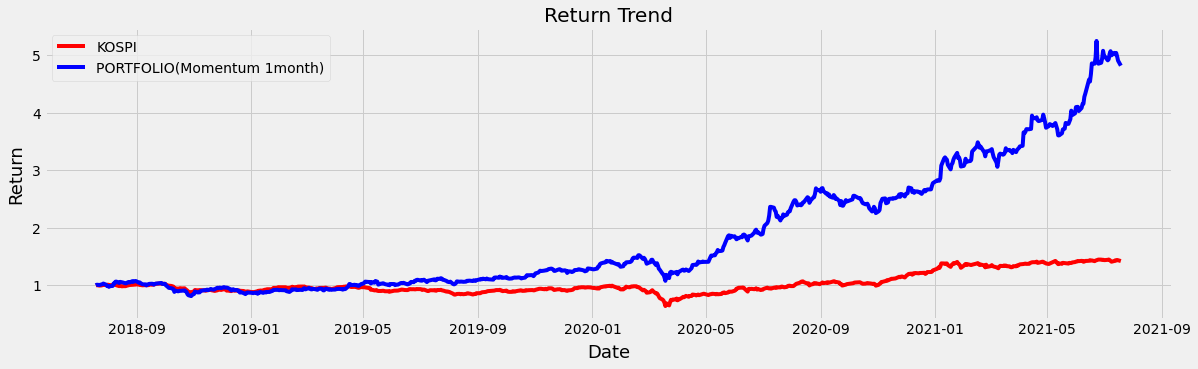

In [ ]:
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ÏôÄ KOSPI ÏßÄÏàòÏùò 'ÎàÑÏ†Å ÏàòÏùµÎ•† Ï∂îÏù¥'Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÎπÑÍµê

# matplotlib.pyplot Ïä§ÌÉÄÏùºÏãúÌä∏ ÏÑ§Ï†ï
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.savefig("cust_eff_return.png", dpi=100)
plt.show()

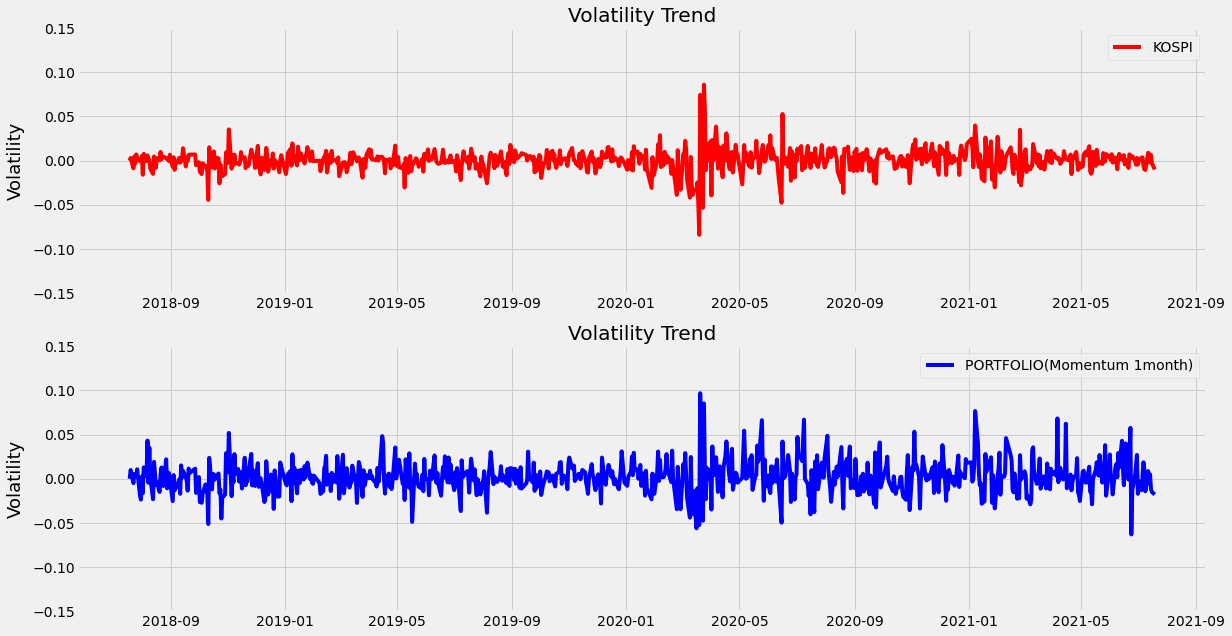

In [ ]:
# Î≥ÄÎèôÎ•† ÎπÑÍµê
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.savefig("cust_eff_volatility.png", dpi=100)
plt.show()

In [ ]:
print('----- Customized portfolio performance -----')
# Show Risk Limit
print('Risk limit: ', vol_limit)

# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)
rmse = da._allocation_rmse_error(verbose=False)

----- Customized portfolio performance -----
Risk limit:  0.3
Funds: 15000000 KRW
Funds Remaining:  53000.0  KRW
Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44
Allocation has RMSE: 0.001


#### ver02> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú ( 5Í∞ú Ï¢ÖÎ™© )

In [ ]:
df2

005930  000660  035720  035420  051910
Date                                              
2018-07-19   46900   90300   22881  153217  336000
2018-07-20   47450   87900   23082  154218  332500
2018-07-23   46500   81700   23182  155019  333000
2018-07-24   46150   83600   23483  149211  330500
2018-07-25   46150   80500   23684  149411  361500
...            ...     ...     ...     ...     ...
2021-07-13   79800  123000  161000  441000  840000
2021-07-14   79500  123500  162000  444000  844000
2021-07-15   80600  123500  159500  449000  818000
2021-07-16   79800  121500  157000  447000  828000
2021-07-19   79000  119000  154000  443000  820000

[740 rows x 5 columns]

In [ ]:
cleaned_weights2

OrderedDict([('005930', 0.22898),
             ('000660', 0.0),
             ('035720', 0.77102),
             ('035420', 0.0),
             ('051910', 0.0)])

In [ ]:
len(cleaned_weights2)

5

In [ ]:
# Í∞Å ÏùºÏûêÎ≥Ñ, Ï¢ÖÎ™©Î≥Ñ Ï¢ÖÍ∞ÄÏóê Ìï¥Îãπ weightsÎ•º Í≥±Ìï¥Ï£ºÍ∏∞
for i, weight in cleaned_weights2.items():
    df2[i] = df2[i]*weight

In [ ]:
df2

005930  000660        035720  035420  051910
Date                                                       
2018-07-19  10739.162     0.0   17641.70862     0.0     0.0
2018-07-20  10865.101     0.0   17796.68364     0.0     0.0
2018-07-23  10647.570     0.0   17873.78564     0.0     0.0
2018-07-24  10567.427     0.0   18105.86266     0.0     0.0
2018-07-25  10567.427     0.0   18260.83768     0.0     0.0
...               ...     ...           ...     ...     ...
2021-07-13  18272.604     0.0  124134.22000     0.0     0.0
2021-07-14  18203.910     0.0  124905.24000     0.0     0.0
2021-07-15  18455.788     0.0  122977.69000     0.0     0.0
2021-07-16  18272.604     0.0  121050.14000     0.0     0.0
2021-07-19  18089.420     0.0  118737.08000     0.0     0.0

[740 rows x 5 columns]

In [ ]:
# ÏùºÏûêÎ≥Ñ Ï¢ÖÎ™©Ïùò (Ï¢ÖÍ∞Ä*ÎπÑÏ§ë) Ìï©Í≥ÑÎ•º PortÏó¥Ïóê Ï†ÄÏû•
df2['Port'] = df2.sum(axis = 1)
df2

005930  000660        035720  035420  051910          Port
Date                                                                     
2018-07-19  10739.162     0.0   17641.70862     0.0     0.0   28380.87062
2018-07-20  10865.101     0.0   17796.68364     0.0     0.0   28661.78464
2018-07-23  10647.570     0.0   17873.78564     0.0     0.0   28521.35564
2018-07-24  10567.427     0.0   18105.86266     0.0     0.0   28673.28966
2018-07-25  10567.427     0.0   18260.83768     0.0     0.0   28828.26468
...               ...     ...           ...     ...     ...           ...
2021-07-13  18272.604     0.0  124134.22000     0.0     0.0  142406.82400
2021-07-14  18203.910     0.0  124905.24000     0.0     0.0  143109.15000
2021-07-15  18455.788     0.0  122977.69000     0.0     0.0  141433.47800
2021-07-16  18272.604     0.0  121050.14000     0.0     0.0  139322.74400
2021-07-19  18089.420     0.0  118737.08000     0.0     0.0  136826.50000

[740 rows x 6 columns]

In [ ]:
# ÏùºÏûêÎ≥Ñ Ï¢ÖÍ∞ÄÏùò Ï†ÑÏùºÎåÄÎπÑ Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†)ÏùÑ portfolioÎùºÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
portfolio2 = df2[['Port']].pct_change()
portfolio2

Port
Date                
2018-07-19       NaN
2018-07-20  0.009898
2018-07-23 -0.004900
2018-07-24  0.005327
2018-07-25  0.005405
...              ...
2021-07-13 -0.005226
2021-07-14  0.004932
2021-07-15 -0.011709
2021-07-16 -0.014924
2021-07-19 -0.017917

[740 rows x 1 columns]

In [ ]:
# ÏΩîÏä§ÌîºÏßÄÏàò Î∂àÎü¨Ïò§Í∏∞
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

Close
Date               
2018-07-19  2282.29
2018-07-20  2289.19
2018-07-23  2269.31
2018-07-24  2280.20
2018-07-25  2273.03
...             ...
2021-07-13  3271.38
2021-07-14  3264.81
2021-07-15  3286.22
2021-07-16  3276.91
2021-07-19  3244.04

[740 rows x 1 columns]

In [ ]:
# ÏΩîÏä§ÌîºÏßÄÏàòÏùò Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) Íµ¨ÌïòÍ∏∞
# Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) = (ÎãπÏùºÍ∞ÄÍ≤©-Ï†ÑÏùºÍ∞ÄÍ≤©) / Ï†ÑÏùºÍ∞ÄÍ≤©
# 7/20Ïùò Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) = (7/20 Í∞ÄÍ≤©-7-19 Í∞ÄÍ≤©) / 7/19 Í∞ÄÍ≤©
kospi_pct = kospi.pct_change()
kospi_pct

Close
Date                
2018-07-19       NaN
2018-07-20  0.003023
2018-07-23 -0.008684
2018-07-24  0.004799
2018-07-25 -0.003144
...              ...
2021-07-13  0.007673
2021-07-14 -0.002008
2021-07-15  0.006558
2021-07-16 -0.002833
2021-07-19 -0.010031

[740 rows x 1 columns]

In [ ]:
# ÏΩîÏä§ÌîºÏôÄ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ìï©ÏπòÍ∏∞
result2 = kospi_pct.join(portfolio2)
result2

Close      Port
Date                          
2018-07-19       NaN       NaN
2018-07-20  0.003023  0.009898
2018-07-23 -0.008684 -0.004900
2018-07-24  0.004799  0.005327
2018-07-25 -0.003144  0.005405
...              ...       ...
2021-07-13  0.007673 -0.005226
2021-07-14 -0.002008  0.004932
2021-07-15  0.006558 -0.011709
2021-07-16 -0.002833 -0.014924
2021-07-19 -0.010031 -0.017917

[740 rows x 2 columns]

In [ ]:
# 1Ïó¥ÏùÑ 0ÏúºÎ°ú 
result2.iloc[0] = 0
result2

Close      Port
Date                          
2018-07-19  0.000000  0.000000
2018-07-20  0.003023  0.009898
2018-07-23 -0.008684 -0.004900
2018-07-24  0.004799  0.005327
2018-07-25 -0.003144  0.005405
...              ...       ...
2021-07-13  0.007673 -0.005226
2021-07-14 -0.002008  0.004932
2021-07-15  0.006558 -0.011709
2021-07-16 -0.002833 -0.014924
2021-07-19 -0.010031 -0.017917

[740 rows x 2 columns]

In [ ]:
# Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
result2.columns = ['KOSPI', 'PORTFOLIO']
result2

KOSPI  PORTFOLIO
Date                           
2018-07-19  0.000000   0.000000
2018-07-20  0.003023   0.009898
2018-07-23 -0.008684  -0.004900
2018-07-24  0.004799   0.005327
2018-07-25 -0.003144   0.005405
...              ...        ...
2021-07-13  0.007673  -0.005226
2021-07-14 -0.002008   0.004932
2021-07-15  0.006558  -0.011709
2021-07-16 -0.002833  -0.014924
2021-07-19 -0.010031  -0.017917

[740 rows x 2 columns]

In [ ]:
# 1ÏóêÏÑú ÏãúÏûëÌï¥ÏÑú, Ï†ÑÏùºÎåÄÎπÑ Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏàòÏπòÌôîÌïòÍ∏∞
wealth2 = (1+result2).cumprod()
wealth2

KOSPI  PORTFOLIO
Date                           
2018-07-19  1.000000   1.000000
2018-07-20  1.003023   1.009898
2018-07-23  0.994313   1.004950
2018-07-24  0.999084   1.010303
2018-07-25  0.995943   1.015764
...              ...        ...
2021-07-13  1.433376   5.017705
2021-07-14  1.430497   5.042451
2021-07-15  1.439878   4.983409
2021-07-16  1.435799   4.909037
2021-07-19  1.421397   4.821082

[740 rows x 2 columns]

## ÏãúÍ∞ÅÌôî

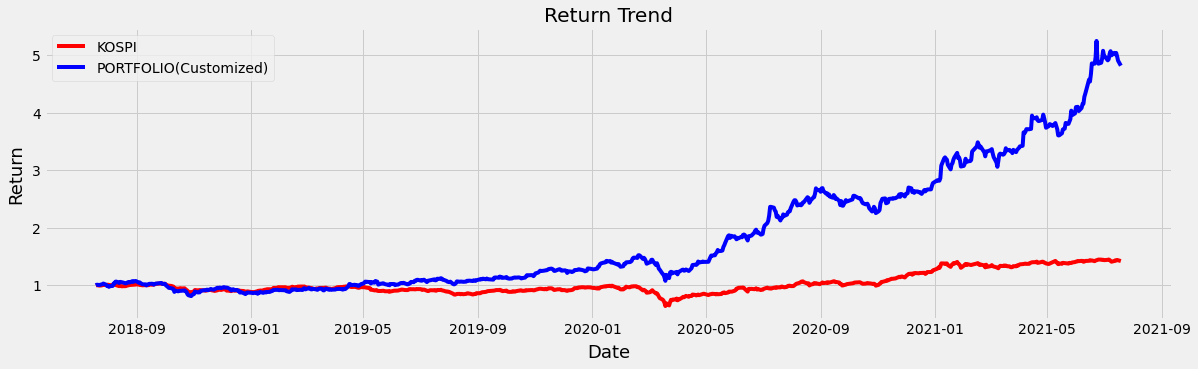

In [ ]:
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ÏôÄ KOSPI ÏßÄÏàòÏùò 'ÎàÑÏ†Å ÏàòÏùµÎ•† Ï∂îÏù¥'Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÎπÑÍµê

# matplotlib.pyplot Ïä§ÌÉÄÏùºÏãúÌä∏ ÏÑ§Ï†ï
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth2.index, wealth2.KOSPI , 'r', label='KOSPI')
plt.plot(wealth2.index, wealth2.PORTFOLIO ,'b', label="PORTFOLIO(Customized)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.savefig("cust_eff_return2.png", dpi=100)
plt.show()

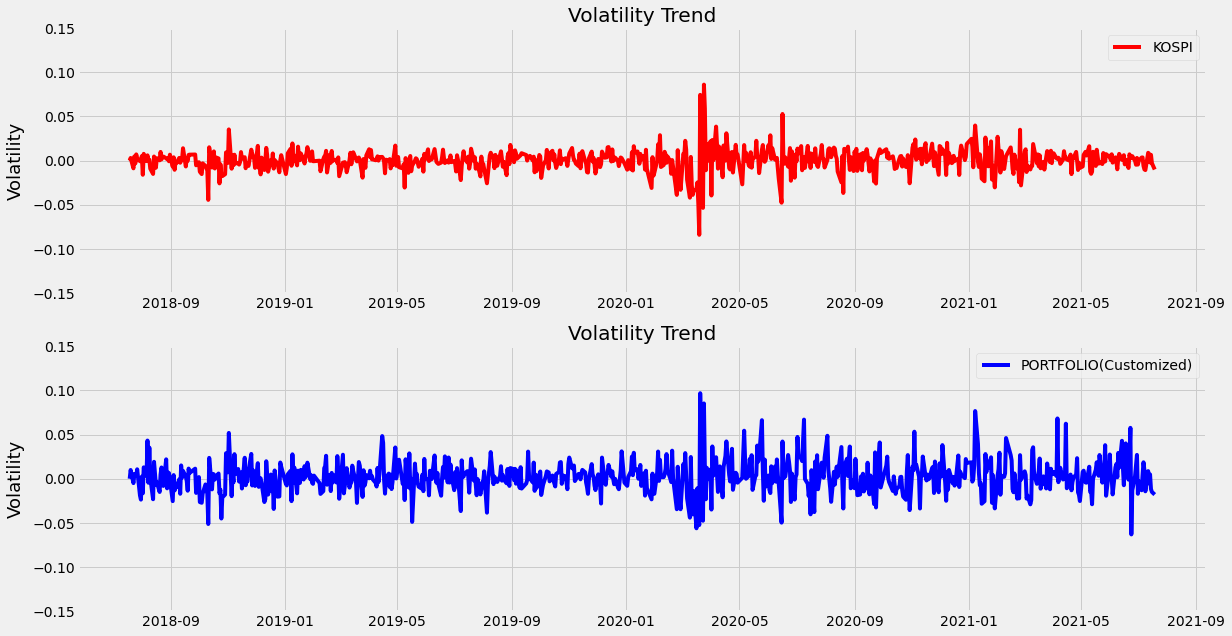

In [ ]:
# Î≥ÄÎèôÎ•† ÎπÑÍµê
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result2.index, result2.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result2.index, result2.PORTFOLIO ,'b', label="PORTFOLIO(Customized)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.savefig("cust_eff_volatility2.png", dpi=100)
plt.show()

In [ ]:
portfolio_df_sorted2

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)     Ìà¨ÏûêÍ∏àÏï°(Ïõê)     Ìà¨ÏûêÎπÑÏ§ë
0    Ïπ¥Ïπ¥Ïò§  035720   75.0  11550000.0  0.77273
1   ÏÇºÏÑ±Ï†ÑÏûê  005930   43.0   3397000.0  0.22727
Ìï©Í≥Ñ   NaN     NaN  118.0  14947000.0  1.00000

In [ ]:
print('-----  Customized portfolio performance -----')
# Show Risk Limit
print('Risk limit: ', vol_limit2)

# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover2, ' KRW')

# Show Portfolio performance
ef2.portfolio_performance(verbose=True)
rmse2 = da2._allocation_rmse_error(verbose=False)

-----  Customized portfolio performance -----
Risk limit:  0.3
Funds: 15000000 KRW
Funds Remaining:  53000.0  KRW
Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44
Allocation has RMSE: 0.001
